# **1. Import Dependencies**

In [98]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr

# **2. Load Data**

In [99]:
data_dir = 'Data' 

In [100]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 392 files belonging to 3 classes.


# **3. Fillter class with unwanted images and files**

In [101]:
class_names = data.class_names
class_names = [c for c in class_names if c != ".ipynb_checkpoints"]
print("Updated class_names:", class_names)

Updated class_names: ['Bikes', 'Cars']


In [102]:
def filter_data(data):
    filtered_data = []
    for example in data:
        try:
            image = tf.image.decode_image(example)
            filtered_data.append(example)
        except:
            pass
    return filtered_data


In [103]:
print("Updated class_names:", class_names)

Updated class_names: ['Bikes', 'Cars']


In [104]:
data_iterator = data.as_numpy_iterator()

In [105]:
batch = data_iterator.next()

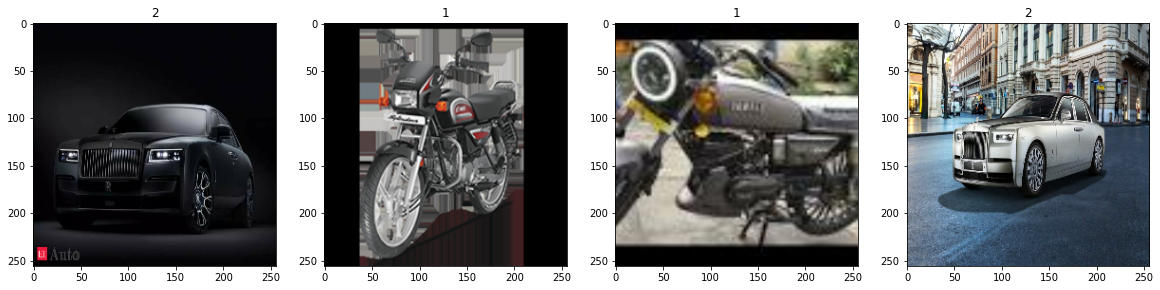

In [106]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **4. Scale Data**

In [107]:
data = data.map(lambda x,y: (x/255, y))

In [108]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          ...,
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.29803923, 0.5019608 ],
          [0.        , 0.29803923, 0.5019608 ]],
 
         [[0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          ...,
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.29803923, 0.5019608 ],
          [0.        , 0.29803923, 0.5019608 ]],
 
         [[0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          ...,
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ],
          [0.        , 0.3019608 , 0.5058824 ]],
 
         ...,
 
         [[0.        , 0.29656097, 0.5063955 ],
          [0.     

# **5. Split Data**

In [109]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [110]:
train_size
val_size

2

In [111]:
test_size

1

In [112]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **6. Build Deep Learning Model**

In [113]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [115]:
model = Sequential()

In [116]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# **7. Train**

In [119]:
logdir='logs'

In [120]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [121]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [122]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 12s 1s/step - loss: -60.3575 - accuracy: 0.4653 - val_loss: -249.7246 - val_accuracy: 0.5156
Epoch 2/20
9/9 [==============================] - 12s 1s/step - loss: -1065.6926 - accuracy: 0.4792 - val_loss: -2879.3643 - val_accuracy: 0.4844
Epoch 3/20
9/9 [==============================] - 12s 1s/step - loss: -7643.1582 - accuracy: 0.5104 - val_loss: -18706.0703 - val_accuracy: 0.5000
Epoch 4/20
9/9 [==============================] - 11s 1s/step - loss: -47304.4453 - accuracy: 0.4688 - val_loss: -87013.5781 - val_accuracy: 0.5156
Epoch 5/20
9/9 [==============================] - 11s 1s/step - loss: -187121.5156 - accuracy: 0.4861 - val_loss: -327415.5625 - val_accuracy: 0.5000
Epoch 6/20
9/9 [==============================] - 11s 1s/step - loss: -605301.0625 - accuracy: 0.4861 - val_loss: -995327.3750 - val_accuracy: 0.4531
Epoch 7/20
9/9 [==============================] - 12s 1s/step - loss: -1607338.2500 - accuracy: 0.5243 - val_loss: -

# **8. Plot Performance**

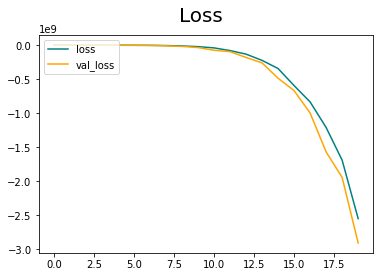

In [123]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

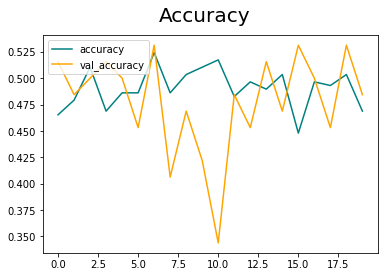

In [124]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **9. Evaluate**

In [125]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [126]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 405ms/step


In [128]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.59375, shape=(), dtype=float32)


# **10. Test**

In [129]:
import cv2

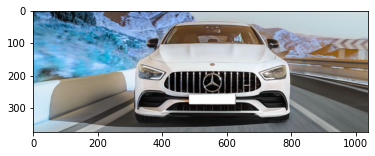

In [141]:
img = cv2.imread('/content/Data/Cars/Car (50).jpg')
plt.imshow(img)
plt.show()

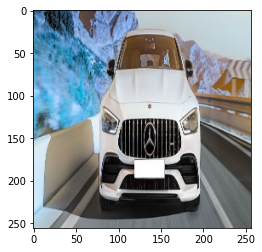

In [142]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [143]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


In [144]:
yhat

array([[1.]], dtype=float32)

In [145]:
if yhat > 0.5: 
    print(f'Predicted class is car')
else:
    print(f'Predicted class is bike')

Predicted class is car
